<a href="https://colab.research.google.com/github/LatiefDataVisionary/demand-forecasting-retail-college-task/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demand Forecasting for Retail: A Machine Learning Pipeline Approach**

## **Project Overview**

**College Course:** Model Development Engineering

**Objective:** To develop a robust machine learning model to accurately forecast daily product demand for a retail company. This involves a comprehensive data pipeline, including merging multiple data sources, extensive feature engineering, and model comparison to optimize inventory management and reduce costs.

## **Chapter 1: Project Setup**

This chapter covers the initial setup, including importing necessary libraries and loading the datasets from their sources.

### **1.1. Import Libraries**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Set plotting style
sns.set_style("whitegrid")

### **1.2. Load Datasets**

In [106]:
data1 = 'https://raw.githubusercontent.com/LatiefDataVisionary/demand-forecasting-retail-college-task/refs/heads/main/data/raw/Dataset%201_Retail%20Store%20Inventory%20and%20Demand%20Forecasting.csv'
data2 = 'https://raw.githubusercontent.com/LatiefDataVisionary/demand-forecasting-retail-college-task/refs/heads/main/data/raw/Dataset%202_Retail%20Sales%20Data%20with%20Seasonal%20Trends%20%26%20Marketing.csv'
data3 = 'https://raw.githubusercontent.com/LatiefDataVisionary/demand-forecasting-retail-college-task/refs/heads/main/data/raw/Dataset%203_Strategic%20Supply%20Chain%20Demand%20Forecasting%20Dataset.csv'

df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
df3 = pd.read_csv(data3)

print("df1 loaded successfully.")
print("df2 loaded successfully.")
print("df3 loaded successfully.")

df1 loaded successfully.
df2 loaded successfully.
df3 loaded successfully.


#### **1.2.1. Data Information**

In [107]:
df1.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [109]:
df2.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [111]:
df3.head()

,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
0,2023-01-01,151,99,0,0,0.983893,1.314333,0,126.932922,0.000000,12566.359326,False,False,True,False,False,True,False,False,95.0
1,2023-01-02,192,95,1,0,0.977615,1.439582,0,151.355405,0.000000,14378.763512,False,True,False,False,True,False,False,False,101.0
2,2023-01-03,114,101,0,0,0.983913,1.094795,0,191.701693,0.000000,19361.870952,False,False,False,True,True,False,False,False,33.0
3,2023-01-04,171,33,0,0,1.191956,0.907672,0,173.106487,0.000000,5712.514059,False,False,False,True,False,True,False,False,82.0
4,2023-01-05,160,82,0,1,0.855711,1.479690,0,138.587491,10.995213,10114.659145,True,False,False,False,False,False,True,False,13.0


In [112]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    4999 non-null   object 
 1   product_id              4999 non-null   int64  
 2   sales_units             4999 non-null   int64  
 3   holiday_season          4999 non-null   int64  
 4   promotion_applied       4999 non-null   int64  
 5   competitor_price_index  4999 non-null   float64
 6   economic_index          4999 non-null   float64
 7   weather_impact          4999 non-null   int64  
 8   price                   4999 non-null   float64
 9   discount_percentage     4999 non-null   float64
 10  sales_revenue           4999 non-null   float64
 11  region_Europe           4999 non-null   bool   
 12  region_North America    4999 non-null   bool   
 13  store_type_Retail       4999 non-null   bool   
 14  store_type_Wholesale    4999 non-null   

#### **1.2.2. Data Summary Statistics**

In [113]:
df1.describe(include='all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
count,76000,76000,76000,76000,76000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000,76000.000000,76000.000000,76000,76000.000000,76000.000000
unique,760,5,20,5,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,2024-01-30,S001,P0001,Groceries,North,NaN,NaN,NaN,NaN,NaN,Cloudy,NaN,NaN,Winter,NaN,NaN
freq,100,15200,3800,30400,30400,NaN,NaN,NaN,NaN,NaN,24360,NaN,NaN,21000,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,301.062842,88.827316,89.090645,67.726028,9.087039,NaN,0.328947,69.454029,NaN,0.200000,104.317158
std,NaN,NaN,NaN,NaN,NaN,226.510161,43.994525,162.404627,39.377899,7.475781,NaN,0.469834,40.943818,NaN,0.400003,46.964801
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.740000,0.000000,NaN,0.000000,4.290000,NaN,0.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,136.000000,58.000000,0.000000,31.997500,5.000000,NaN,0.000000,32.620000,NaN,0.000000,71.000000
50%,NaN,NaN,NaN,NaN,NaN,227.000000,84.000000,0.000000,64.500000,10.000000,NaN,0.000000,65.700000,NaN,0.000000,100.000000
75%,NaN,NaN,NaN,NaN,NaN,408.000000,114.000000,121.000000,95.830000,10.000000,NaN,1.000000,97.932500,NaN,0.000000,133.000000


In [114]:
df2.describe(include='all')

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29967,30000,30000,30000,29999.000000,30000.000000,30000.000000
unique,NaN,NaN,290,15668,15732,8,NaN,NaN,NaN
top,NaN,NaN,"THE COUNTRY VINTNER, LLC DBA WINEBOW",16225,TENTH WARD DIST CO CARAWAY RYE - 750ML,WINE,NaN,NaN,NaN
freq,NaN,NaN,2041,4,5,18680,NaN,NaN,NaN
mean,2020.0,3.911467,NaN,NaN,NaN,NaN,6.939796,6.594058,27.431031
std,0.0,2.836788,NaN,NaN,NaN,NaN,33.081054,27.879428,272.166085
min,2020.0,1.000000,NaN,NaN,NaN,NaN,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2020.0,3.000000,NaN,NaN,NaN,NaN,0.160000,0.000000,1.000000
75%,2020.0,7.000000,NaN,NaN,NaN,NaN,2.920000,3.000000,6.000000


In [115]:
df3.describe(include='all')

,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
count,4999,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999,4999,4999,4999,4999,4999,4999,4999,4999.000000
unique,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN
top,2036-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3321,3315,3332,3308,3997,4011,4031,3936,NaN
mean,NaN,148.897780,103.287057,0.201240,0.291458,1.000817,1.006562,0.143429,110.942274,5.131256,10868.506476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.293059
std,NaN,28.966902,54.805135,0.400967,0.454480,0.116095,0.287037,0.350545,51.947268,8.879610,8261.926164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.806308
min,NaN,100.000000,10.000000,0.000000,0.000000,0.800081,0.500021,0.000000,20.016788,0.000000,205.710553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,124.000000,56.000000,0.000000,0.000000,0.900912,0.764042,0.000000,66.092894,0.000000,4246.400673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000
50%,NaN,148.000000,101.000000,0.000000,0.000000,0.999048,1.010684,0.000000,111.391956,0.000000,8746.124067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.000000
75%,NaN,174.000000,151.000000,0.000000,1.000000,1.102838,1.253165,0.000000,156.397044,8.850384,15700.271472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.000000


#### **1.2.3. Unique Values and Counts for Object Columns**

In [116]:
for col in df1.select_dtypes(include='object').columns:
    print(f"### Column: {col}\n")
    print(f"**Unique Values:**\n{df1[col].unique()}\n")
    print(f"**Value Counts:**\n{df1[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")

### Column: Date

**Unique Values:**
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11'
 '2022-03-12' '2022-03-13' '2022-03-14'

In [117]:
for col in df2.select_dtypes(include='object').columns:
    print(f"### Column: {col}\n")
    print(f"**Unique Values:**\n{df2[col].unique()}\n")
    print(f"**Value Counts:**\n{df2[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")

Streaming output truncated to the last 5000 lines.
| FLYING DOG SNAKE DOG IPA 1/6 KEG                                                  | 1       |
| NB RED ROBIN 1969 LAGER 1/2 KEG                                                   | 1       |
| HEAVY SEAS DRINK LIKE A PIRATE SAMPLER 2/12PK CAN 12OZ                            | 1       |
| BUD LIGHT ORANGE 15PK 25OZ CAN                                                    | 1       |
| Q DRINKS INDIAN TONIC NA - 6.7OZ                                                  | 1       |
| DUCK RABBIT PORTER 4/6 NR                                                         | 1       |
| EPIC TART'N JUICY 4/6 12OZ CANS                                                   | 1       |
| CHAMPION SHOWER BEER 4/6 12OZ CANS                                                | 1       |
| SLY FOX HELLES 4/6 12OZ CANS                                                      | 1       |
| ITHACA FLOWER POWER 4/6 CANS                                                      |

In [118]:
for col in df3.select_dtypes(include='object').columns:
    print(f"### Column: {col}\n")
    print(f"**Unique Values:**\n{df3[col].unique()}\n")
    print(f"**Value Counts:**\n{df3[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")

Streaming output truncated to the last 5000 lines.
| 2036-09-07 | 1       |
| 2023-01-01 | 1       |
| 2023-01-02 | 1       |
| 2023-01-03 | 1       |
| 2023-01-04 | 1       |
| 2023-01-05 | 1       |
| 2023-01-06 | 1       |
| 2036-08-22 | 1       |
| 2036-08-21 | 1       |
| 2036-08-20 | 1       |
| 2036-08-19 | 1       |
| 2036-08-18 | 1       |
| 2036-08-17 | 1       |
| 2036-08-16 | 1       |
| 2036-08-15 | 1       |
| 2036-08-14 | 1       |
| 2036-08-13 | 1       |
| 2036-08-12 | 1       |
| 2036-08-11 | 1       |
| 2036-08-10 | 1       |
| 2036-08-09 | 1       |
| 2036-08-08 | 1       |
| 2036-08-07 | 1       |
| 2023-02-08 | 1       |
| 2023-02-07 | 1       |
| 2023-02-06 | 1       |
| 2023-02-05 | 1       |
| 2023-02-04 | 1       |
| 2023-02-03 | 1       |
| 2023-02-02 | 1       |
| 2023-02-01 | 1       |
| 2023-01-31 | 1       |
| 2023-01-30 | 1       |
| 2023-01-29 | 1       |
| 2023-01-28 | 1       |
| 2023-01-27 | 1       |
| 2023-01-26 | 1       |
| 2023-01-25 | 1       |

#### **1.2.4. Missing Values Analysis**

In [119]:
print("Missing values in df:")
print(df1.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nDuplicate rows in df1:")
print(df1.duplicated().sum())

Missing values in df:
|                    | 0   |
|:-------------------|:----|
| Date               | 0   |
| Store ID           | 0   |
| Product ID         | 0   |
| Category           | 0   |
| Region             | 0   |
| Inventory Level    | 0   |
| Units Sold         | 0   |
| Units Ordered      | 0   |
| Price              | 0   |
| Discount           | 0   |
| Weather Condition  | 0   |
| Promotion          | 0   |
| Competitor Pricing | 0   |
| Seasonality        | 0   |
| Epidemic           | 0   |
| Demand             | 0   |

Duplicate rows in df1:
0


In [120]:
print("Missing values in df2:")
print(df2.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nDuplicate rows in df2:")
print(df2.duplicated().sum())

Missing values in df2:
|                  | 0   |
|:-----------------|:----|
| YEAR             | 0   |
| MONTH            | 0   |
| SUPPLIER         | 33  |
| ITEM CODE        | 0   |
| ITEM DESCRIPTION | 0   |
| ITEM TYPE        | 0   |
| RETAIL SALES     | 1   |
| RETAIL TRANSFERS | 0   |
| WAREHOUSE SALES  | 0   |

Duplicate rows in df2:
0


In [121]:
print("Missing values in df3:")
print(df3.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nDuplicate rows in df3:")
print(df3.duplicated().sum())

Missing values in df3:
|                        | 0   |
|:-----------------------|:----|
| date                   | 0   |
| product_id             | 0   |
| sales_units            | 0   |
| holiday_season         | 0   |
| promotion_applied      | 0   |
| competitor_price_index | 0   |
| economic_index         | 0   |
| weather_impact         | 0   |
| price                  | 0   |
| discount_percentage    | 0   |
| sales_revenue          | 0   |
| region_Europe          | 0   |
| region_North America   | 0   |
| store_type_Retail      | 0   |
| store_type_Wholesale   | 0   |
| category_Cabinets      | 0   |
| category_Chairs        | 0   |
| category_Sofas         | 0   |
| category_Tables        | 0   |
| future_demand          | 0   |

Duplicate rows in df3:
0


#### **1.2.5. Duplicate Values Analysis**

## **Chapter 2: Data Ingestion and Merging**

The first step in our pipeline is to integrate the three disparate datasets into a single, unified master DataFrame that will serve as the foundation for our analysis and modeling.

### **2.1. Prepare Datasets for Merging**

Standardize column names for consistency before merging.

In [122]:
# Rename columns in df2 and df3
df2 = df2.rename(columns={'ITEM CODE': 'Product ID'})
df3 = df3.rename(columns={'date': 'Date', 'product_id': 'Product ID'})

# Convert Product ID in df2 to string to match df1 and df3
df2['Product ID'] = df2['Product ID'].astype(str)
df1['Product ID'] = df1['Product ID'].astype(str)
df3['Product ID'] = df3['Product ID'].astype(str)


print("Column names standardized and Product ID data types converted.")

Column names standardized and Product ID data types converted.


Kode di bagian ini bertujuan untuk mempersiapkan tiga dataset (`df1`, `df2`, dan `df3`) sebelum digabungkan. Langkah-langkah yang dilakukan adalah:

1.  **Menyeragamkan Nama Kolom:** Mengganti nama kolom di `df2` dan `df3` agar sesuai dengan nama kolom di `df1` yang akan digunakan sebagai kunci penggabungan (`merge`). Kolom 'ITEM CODE' di `df2` dan 'product_id' di `df3` diganti menjadi 'Product ID'. Kolom 'date' di `df3` diganti menjadi 'Date'.
2.  **Mengubah Tipe Data Kolom 'Product ID':** Memastikan bahwa kolom 'Product ID' di ketiga dataset memiliki tipe data yang sama, yaitu string. Ini penting karena penggabungan berdasarkan kolom ini memerlukan tipe data yang konsisten. Kode ini secara eksplisit mengubah tipe data kolom 'Product ID' di `df1`, `df2`, dan `df3` menjadi string.

Dengan menyeragamkan nama kolom dan tipe data 'Product ID', dataset siap untuk digabungkan menjadi satu DataFrame utama.

### **2.2. Merge Datasets**

Perform a two-step merge process to create the `master_df`.

In [123]:
# Merge df1 with df2
master_df = pd.merge(df1, df2[['Product ID', 'SUPPLIER', 'ITEM TYPE', 'RETAIL SALES']], on='Product ID', how='left')

# Merge the result with df3
master_df = pd.merge(master_df, df3[['Date', 'Product ID', 'holiday_season', 'promotion_applied',
                                     'competitor_price_index', 'economic_index', 'weather_impact',
                                     'price', 'discount_percentage', 'sales_revenue', 'region_Europe',
                                     'region_North America', 'store_type_Retail', 'store_type_Wholesale',
                                     'category_Cabinets', 'category_Chairs', 'category_Sofas',
                                     'category_Tables', 'future_demand']],
                     on=['Date', 'Product ID'], how='left')

print("Datasets merged successfully.")
display(master_df.head())

Datasets merged successfully.


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Chapter 3: The 10-Step Data Preparation Pipeline**

This chapter details the comprehensive, 10-step data preparation and cleaning process required to transform the raw, merged data into a feature-rich, model-ready format.

### **Step 1: Data Cleaning and Type Conversion**

Inspect the Master DataFrame and handle missing values.

In [124]:
# Inspect the Master DataFrame
print("Info of master_df:")
master_df.info()

print("\nHead of master_df:")
display(master_df.head())

# Handle Missing Values
print("\nMissing values before handling:")
print(master_df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Fill missing 'SUPPLIER' and 'ITEM TYPE' with "Unknown"
master_df['SUPPLIER'] = master_df['SUPPLIER'].fillna('Unknown')
master_df['ITEM TYPE'] = master_df['ITEM TYPE'].fillna('Unknown')


# Fill missing numerical columns with 0, as the merge resulted in all NaNs for these columns
numerical_cols_from_merge = ['RETAIL SALES', 'holiday_season', 'promotion_applied',
                               'competitor_price_index', 'economic_index', 'weather_impact',
                               'price', 'discount_percentage', 'sales_revenue']

for col in numerical_cols_from_merge:
    if col in master_df.columns and master_df[col].isnull().all(): # Check if all values are NaN
        master_df[col] = master_df[col].fillna(0) # Fill with 0
        print(f"Filled all missing values in {col} with 0.")
    elif col in master_df.columns and master_df[col].isnull().any(): # Check if some values are NaN
         median_val = master_df[col].median()
         master_df[col] = master_df[col].fillna(median_val)
         print(f"Filled some missing values in {col} with median ({median_val}).")


# Fill missing boolean columns with False (assuming NaN in boolean columns implies the condition is false)
boolean_cols_with_missing = ['region_Europe', 'region_North America', 'store_type_Retail', 'store_type_Wholesale',
                             'category_Cabinets', 'category_Chairs', 'category_Sofas', 'category_Tables']
for col in boolean_cols_with_missing:
     if col in master_df.columns and master_df[col].isnull().any():
         master_df[col] = master_df[col].fillna(False)
         print(f"Filled missing values in {col} with False.")


print("\nMissing values after handling:")
print(master_df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Convert Date column to datetime object
master_df['Date'] = pd.to_datetime(master_df['Date'])
print("\n'Date' column converted to datetime.")

# Check for Duplicates
print("\nDuplicate rows in master_df:")
print(master_df.duplicated().sum())

Info of master_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    76000 non-null  object 
 1   Store ID                76000 non-null  object 
 2   Product ID              76000 non-null  object 
 3   Category                76000 non-null  object 
 4   Region                  76000 non-null  object 
 5   Inventory Level         76000 non-null  int64  
 6   Units Sold              76000 non-null  int64  
 7   Units Ordered           76000 non-null  int64  
 8   Price                   76000 non-null  float64
 9   Discount                76000 non-null  int64  
 10  Weather Condition       76000 non-null  object 
 11  Promotion               76000 non-null  int64  
 12  Competitor Pricing      76000 non-null  float64
 13  Seasonality             76000 non-null  object 
 14  Epidemic           

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values before handling:
|                        | 0     |
|:-----------------------|:------|
| Date                   | 0     |
| Store ID               | 0     |
| Product ID             | 0     |
| Category               | 0     |
| Region                 | 0     |
| Inventory Level        | 0     |
| Units Sold             | 0     |
| Units Ordered          | 0     |
| Price                  | 0     |
| Discount               | 0     |
| Weather Condition      | 0     |
| Promotion              | 0     |
| Competitor Pricing     | 0     |
| Seasonality            | 0     |
| Epidemic               | 0     |
| Demand                 | 0     |
| SUPPLIER               | 76000 |
| ITEM TYPE              | 76000 |
| RETAIL SALES           | 76000 |
| holiday_season         | 76000 |
| promotion_applied      | 76000 |
| competitor_price_index | 76000 |
| economic_index         | 76000 |
| weather_impact         | 76000 |
| price                  | 76000 |
| discount_percentage 

/tmp/ipython-input-1982453861.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  master_df[col] = master_df[col].fillna(False)


|                        | 0     |
|:-----------------------|:------|
| Date                   | 0     |
| Store ID               | 0     |
| Product ID             | 0     |
| Category               | 0     |
| Region                 | 0     |
| Inventory Level        | 0     |
| Units Sold             | 0     |
| Units Ordered          | 0     |
| Price                  | 0     |
| Discount               | 0     |
| Weather Condition      | 0     |
| Promotion              | 0     |
| Competitor Pricing     | 0     |
| Seasonality            | 0     |
| Epidemic               | 0     |
| Demand                 | 0     |
| SUPPLIER               | 0     |
| ITEM TYPE              | 0     |
| RETAIL SALES           | 0     |
| holiday_season         | 0     |
| promotion_applied      | 0     |
| competitor_price_index | 0     |
| economic_index         | 0     |
| weather_impact         | 0     |
| price                  | 0     |
| discount_percentage    | 0     |
| sales_revenue     

### **Step 2: Column Consolidation and Selection**

Identify and drop redundant or irrelevant columns. Select the target variable.

In [125]:
# Identify and Drop Redundant Columns
# 'future_demand' is a data leak and must be dropped.
# 'ITEM DESCRIPTION' might be redundant given 'Product ID'.
columns_to_drop = ['future_demand']
master_df = master_df.drop(columns=columns_to_drop)

print(f"Dropped redundant columns: {columns_to_drop}")

# Target Variable Selection
target_variable = 'Demand'
y = master_df[target_variable]
X = master_df.drop(columns=[target_variable])

print(f"Target variable '{target_variable}' selected.")
print("Features DataFrame (X) created.")

Dropped redundant columns: ['future_demand']
Target variable 'Demand' selected.
Features DataFrame (X) created.


### **Step 3: Exploratory Data Analysis (EDA)**

Visualize key aspects of the data to understand trends, distributions, and relationships.

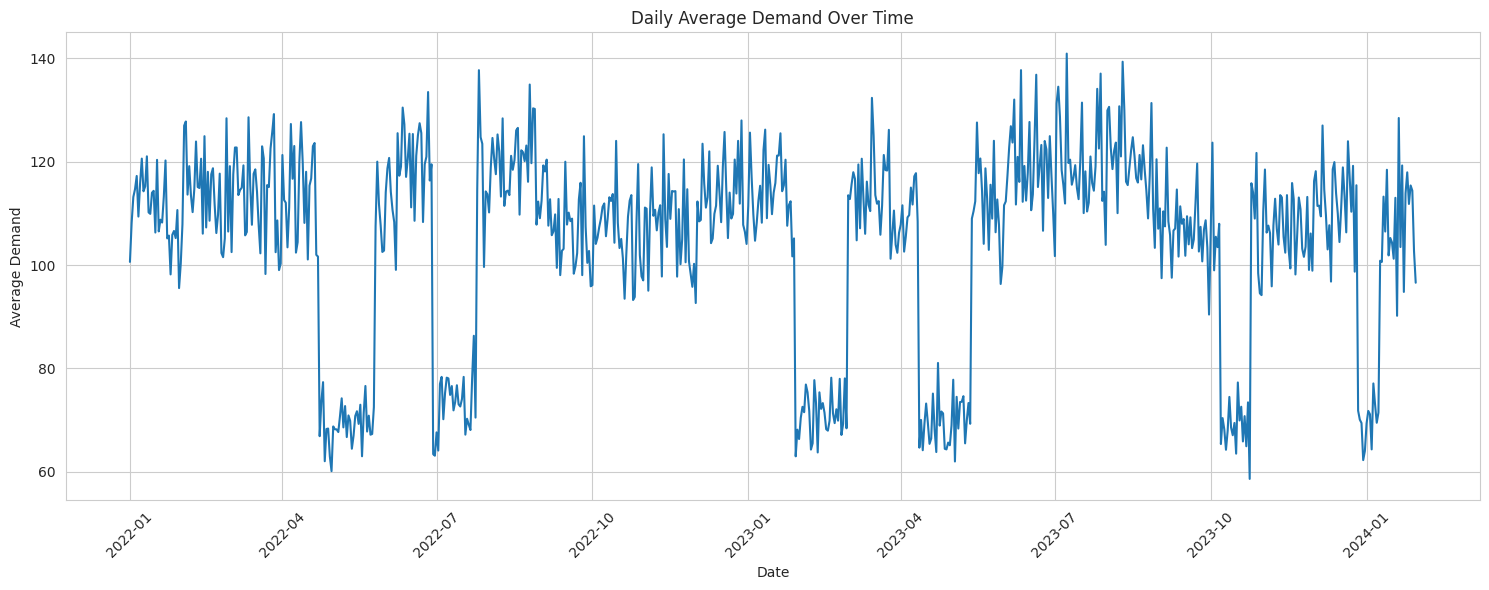

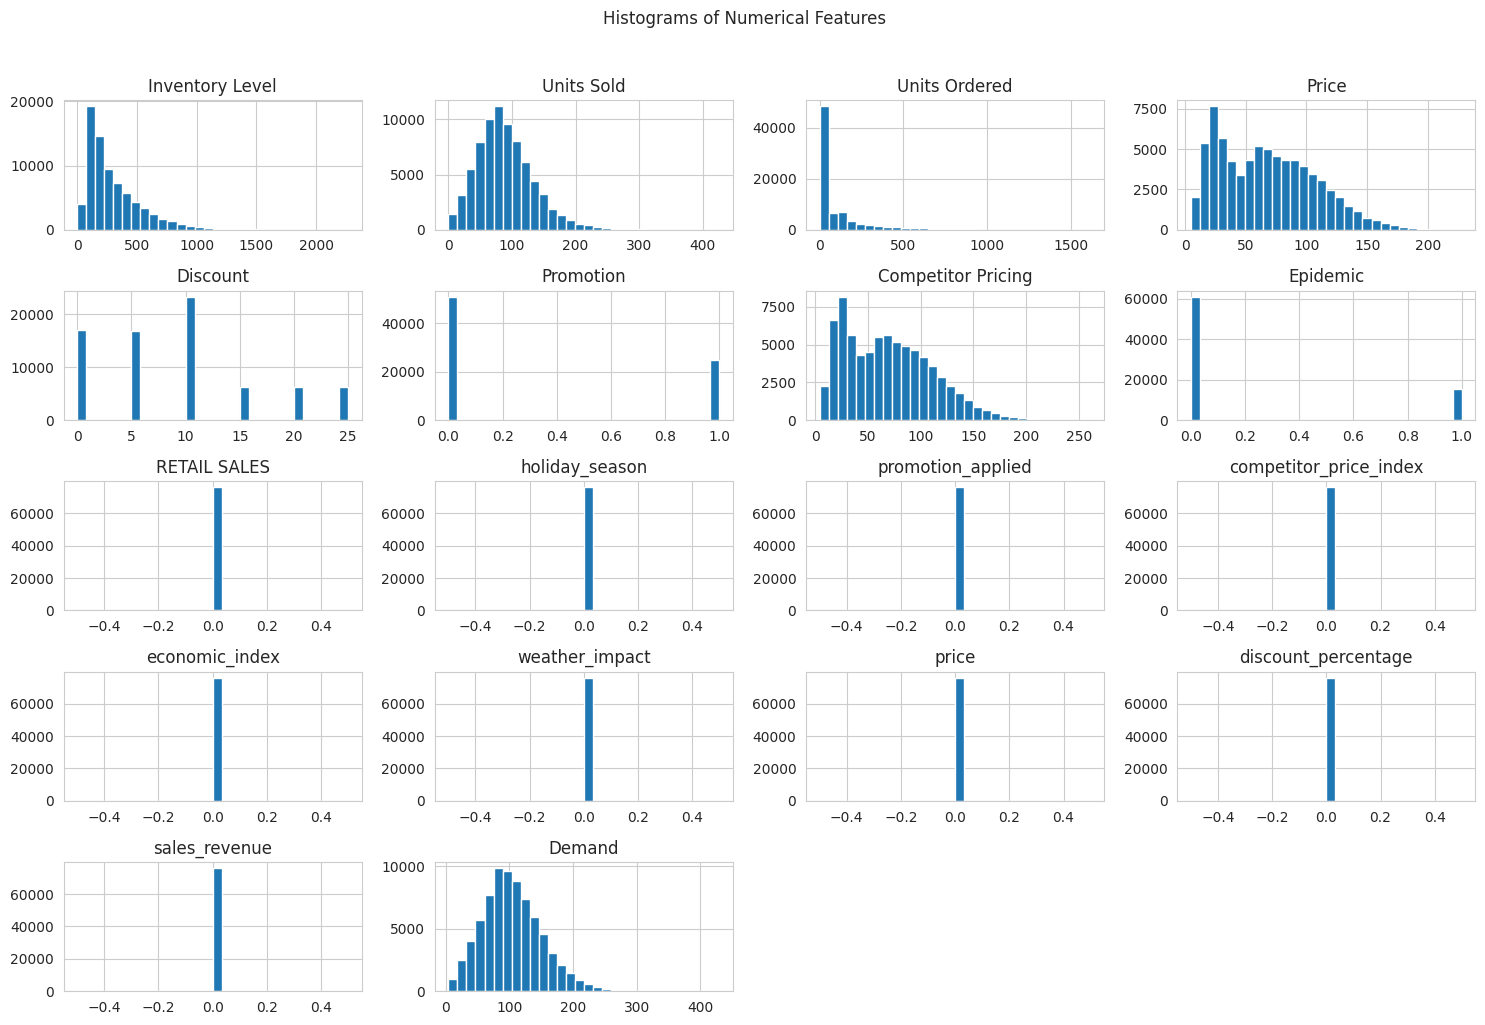

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


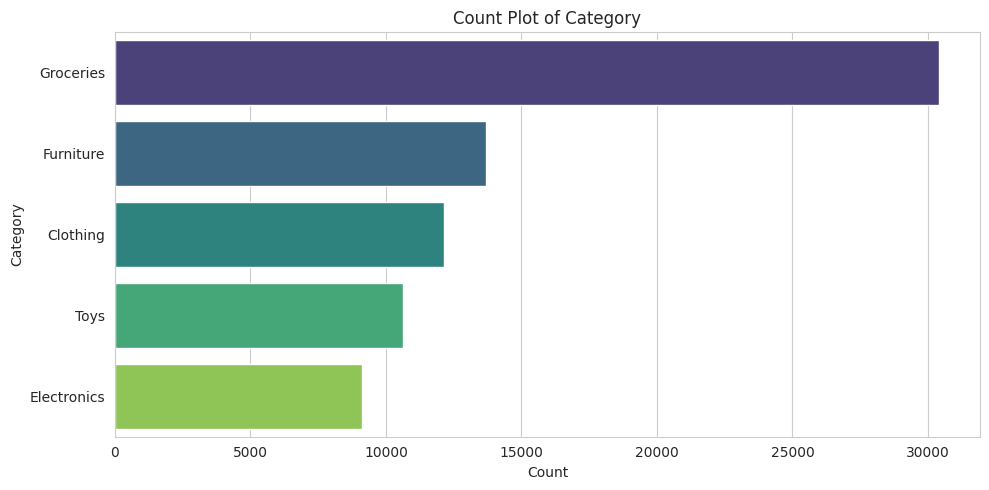

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


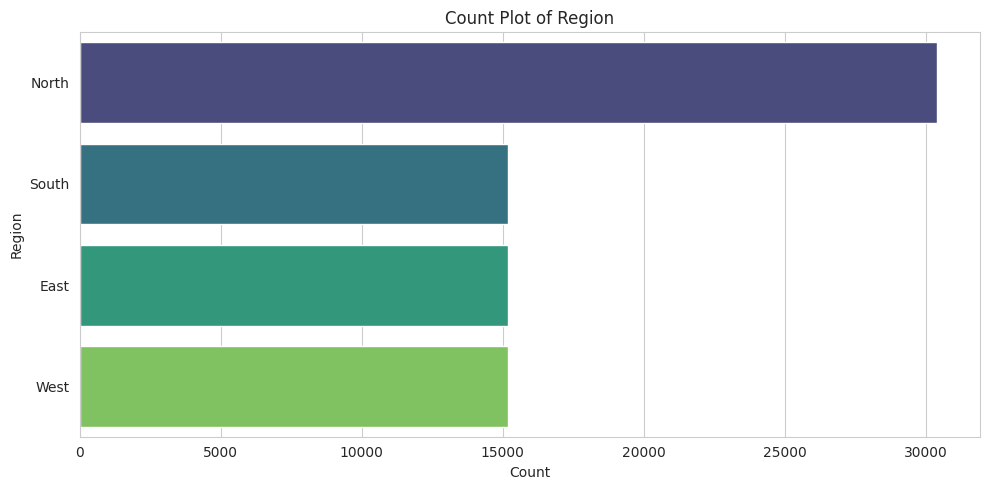

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


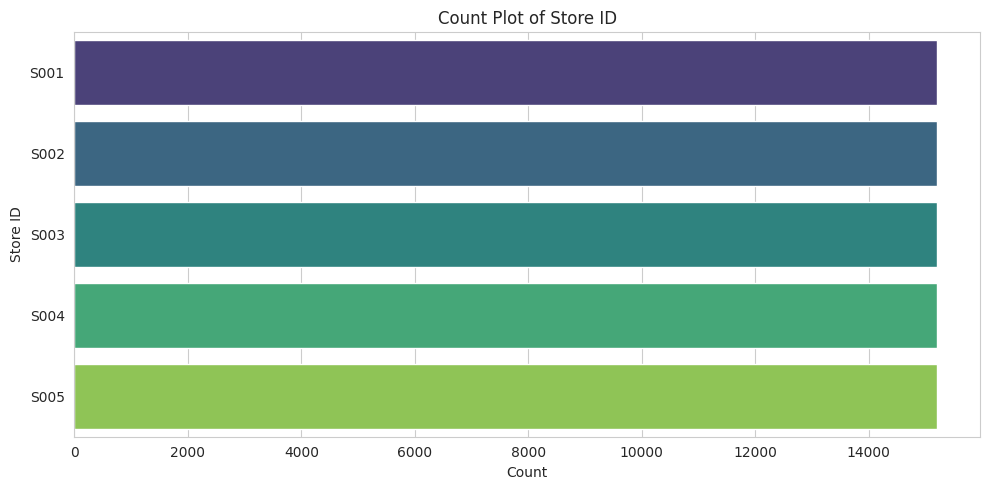

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


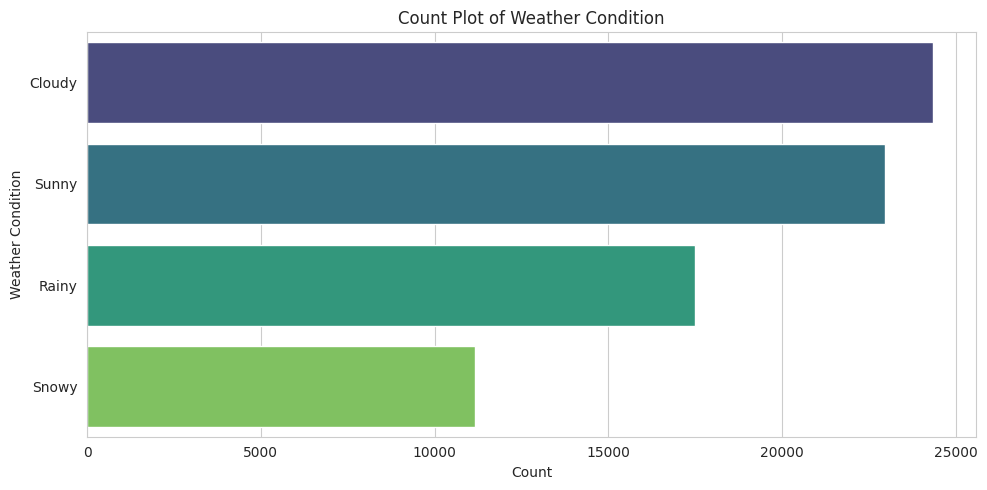

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


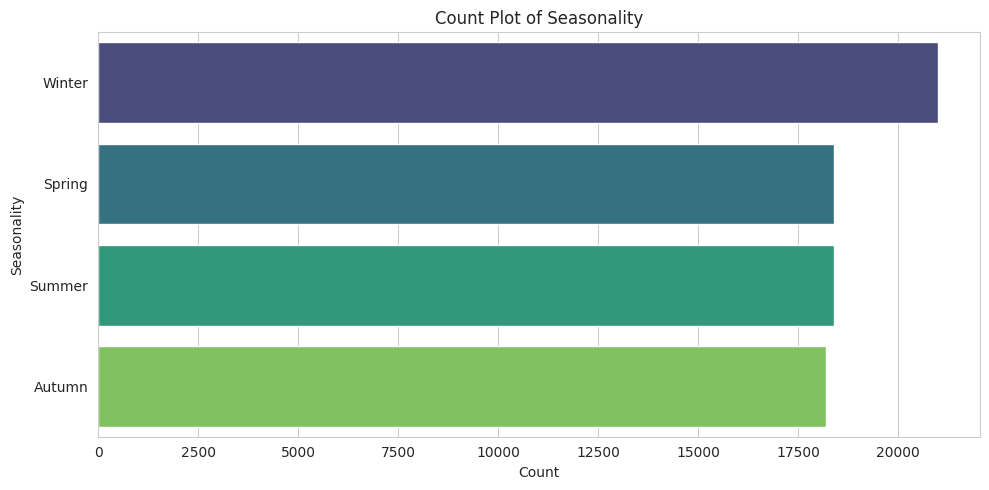

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


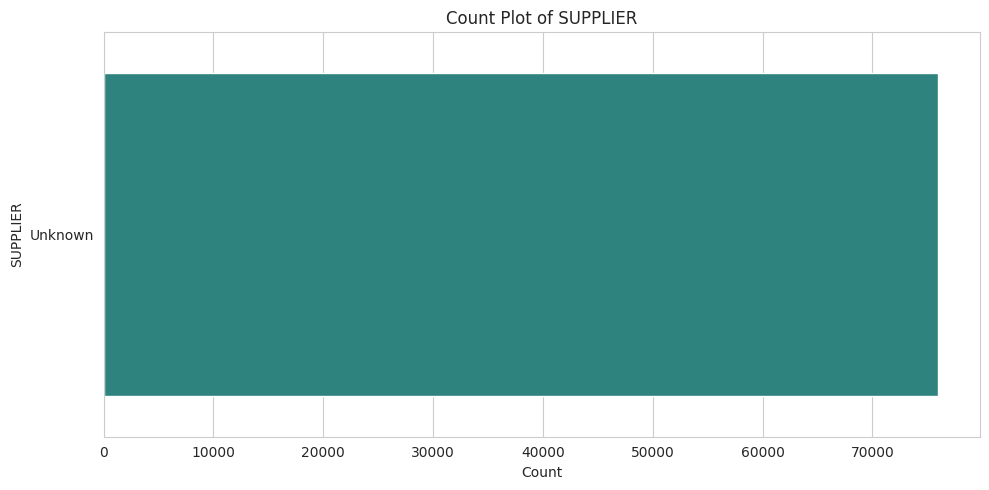

/tmp/ipython-input-1309476391.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


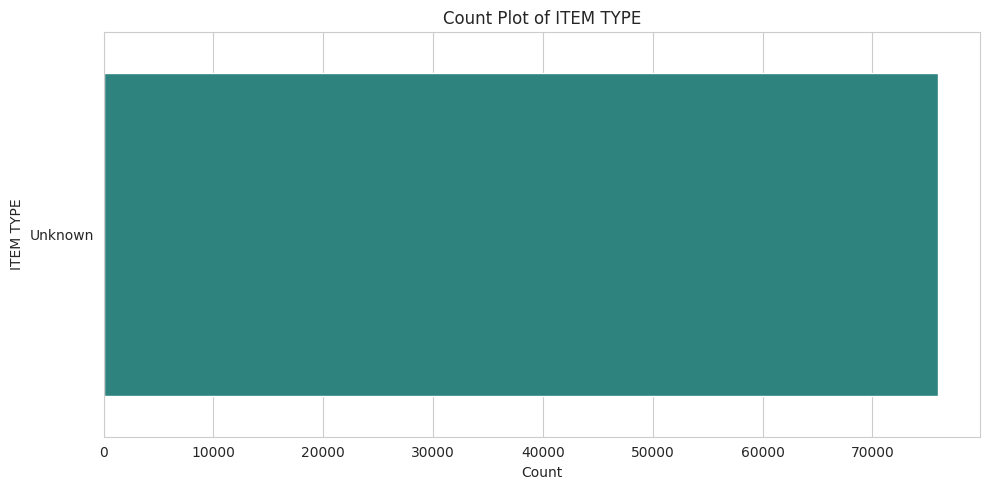

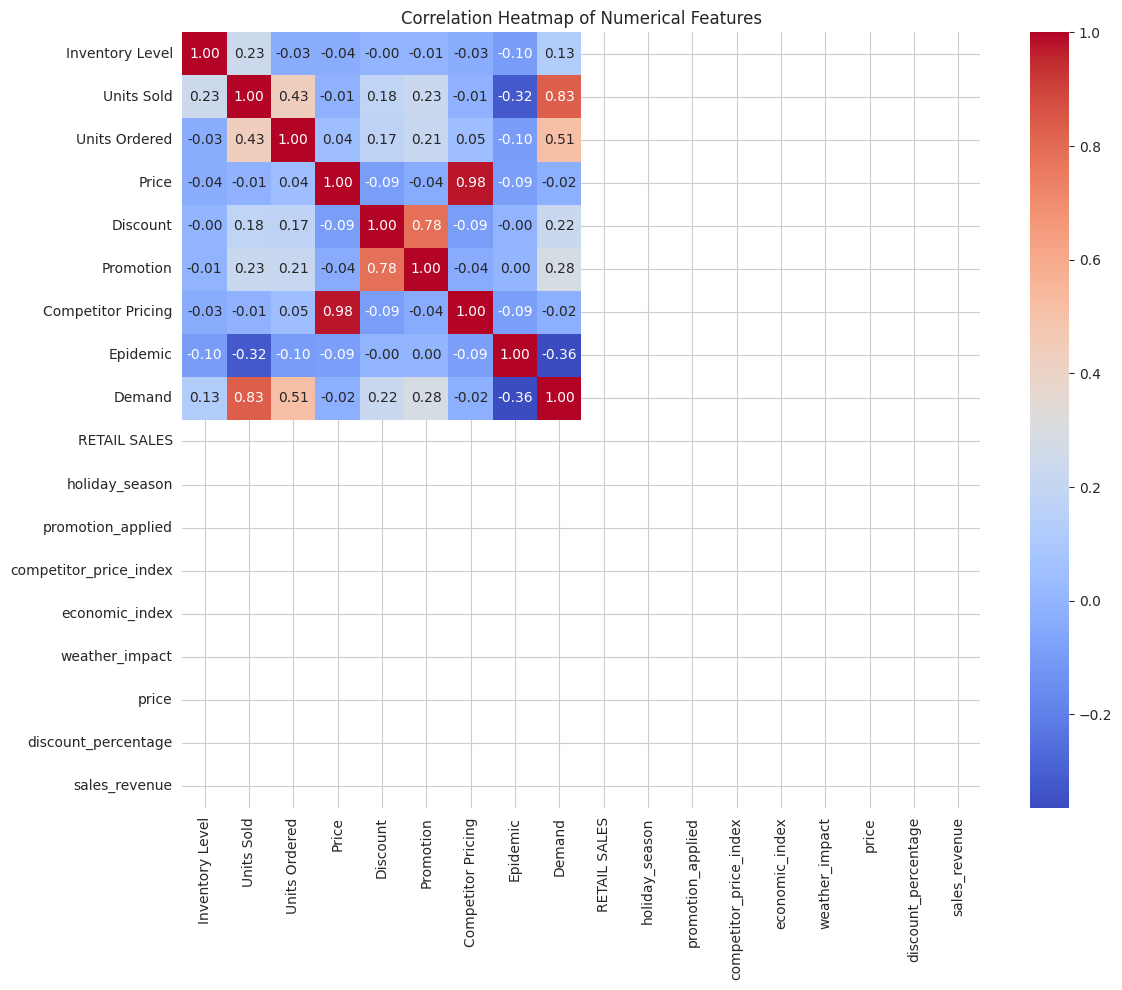

In [126]:
# Time Series Analysis: Plot daily average Demand
daily_demand = master_df.groupby('Date')['Demand'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_demand, x='Date', y='Demand')
plt.title('Daily Average Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution Analysis
# Histograms for numerical features
# Define numerical features more explicitly
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
                      'Promotion', 'Competitor Pricing', 'Epidemic', 'RETAIL SALES',
                      'holiday_season', 'promotion_applied', 'competitor_price_index',
                      'economic_index', 'weather_impact', 'price', 'discount_percentage',
                      'sales_revenue', 'Demand'] # Included 'Demand' for distribution


master_df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Count plots for categorical features
# Define categorical features more explicitly
categorical_features = ['Category', 'Region', 'Store ID', 'Weather Condition', 'Seasonality', 'SUPPLIER', 'ITEM TYPE'] # Added SUPPLIER and ITEM TYPE

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    # Use `dropna=False` to include potential NaN category from merge if any (though we expect them to be filled now)
    sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Correlation Analysis for numerical features
plt.figure(figsize=(12, 10))
# Ensure only numerical columns are included for correlation calculation
numerical_for_corr = master_df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = master_df[numerical_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### **Step 4: Outlier Detection and Treatment**

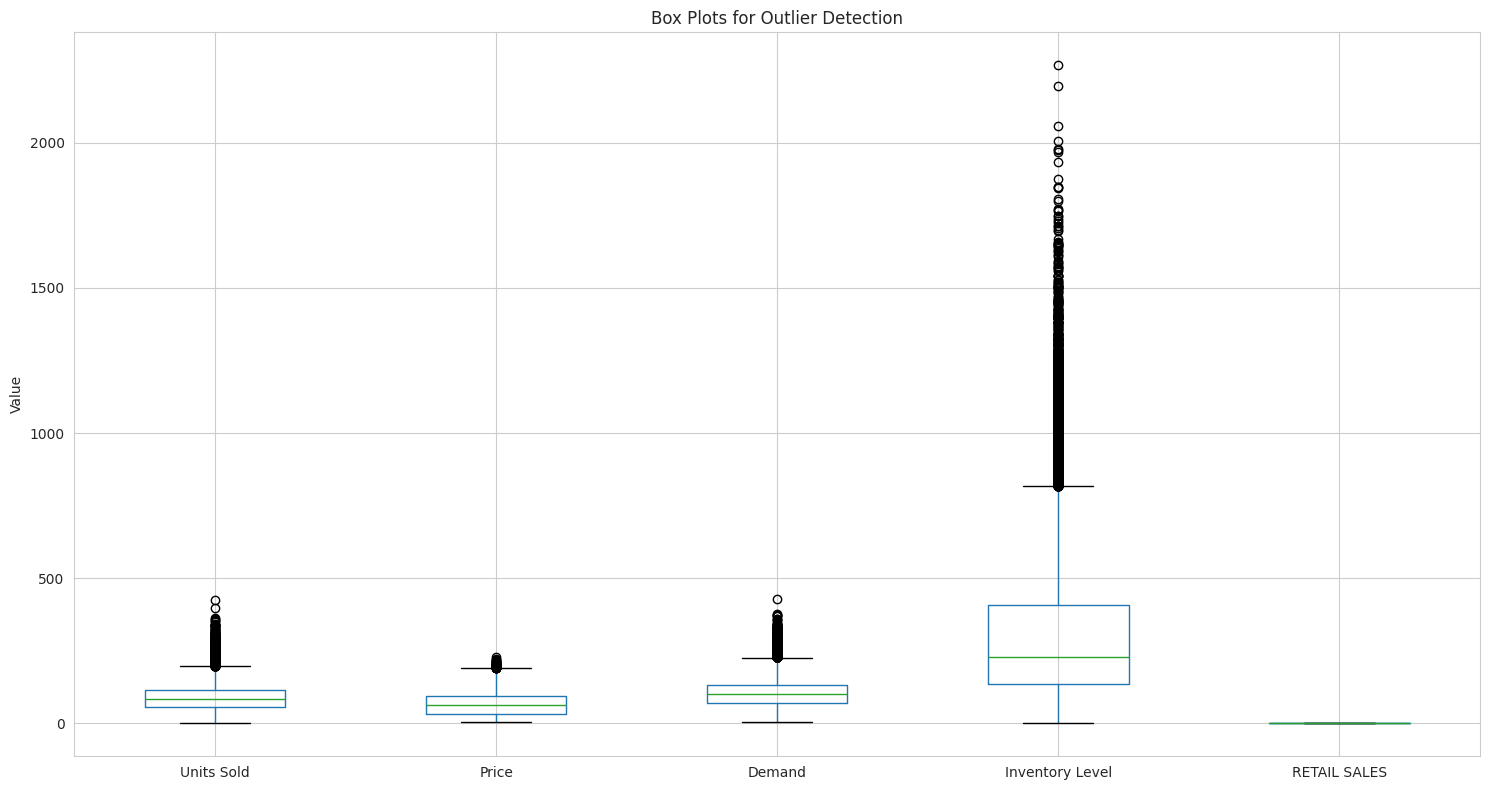

Outlier Treatment (Capping using IQR method):
The Interquartile Range (IQR) method can be used to identify outliers.
Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR can be considered outliers.
Capping involves replacing these outliers with the boundary values (Q1 - 1.5*IQR or Q3 + 1.5*IQR).
Below is commented-out code demonstrating how to cap outliers for 'Units Sold' as an example:

Example: 'Units Sold' capped (new column 'Units Sold_capped' created).


In [127]:
# Visualize Outliers using Box Plots
outlier_features = ['Units Sold', 'Price', 'Demand', 'Inventory Level', 'RETAIL SALES']

plt.figure(figsize=(15, 8))
master_df[outlier_features].boxplot()
plt.title('Box Plots for Outlier Detection')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Treat Outliers (Optional but Recommended)
# Explain the concept of capping outliers using the IQR method.
print("Outlier Treatment (Capping using IQR method):")
print("The Interquartile Range (IQR) method can be used to identify outliers.")
print("Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR can be considered outliers.")
print("Capping involves replacing these outliers with the boundary values (Q1 - 1.5*IQR or Q3 + 1.5*IQR).")
print("Below is commented-out code demonstrating how to cap outliers for 'Units Sold' as an example:")

# Example commented-out code for capping 'Units Sold' outliers:
Q1 = master_df['Units Sold'].quantile(0.25)
Q3 = master_df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
master_df['Units Sold_capped'] = master_df['Units Sold'].clip(lower=lower_bound, upper=upper_bound)
print("\nExample: 'Units Sold' capped (new column 'Units Sold_capped' created).")

Visualize potential outliers and provide an example of outlier treatment.

### **Step 5: Feature Engineering I - Time-Based Features**

Create new features extracted from the 'Date' column.

In [128]:
# Create time-based features
master_df['year'] = master_df['Date'].dt.year
master_df['month'] = master_df['Date'].dt.month
master_df['day'] = master_df['Date'].dt.day
master_df['dayofweek'] = master_df['Date'].dt.dayofweek # Monday=0, Sunday=6
master_df['dayofyear'] = master_df['Date'].dt.dayofyear
master_df['weekofyear'] = master_df['Date'].dt.isocalendar().week.astype(int)
master_df['quarter'] = master_df['Date'].dt.quarter

print("Time-based features created.")
display(master_df[['Date', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']].head())

Time-based features created.


,Date,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,2022-01-01,2022,1,1,5,1,52,1
1,2022-01-01,2022,1,1,5,1,52,1
2,2022-01-01,2022,1,1,5,1,52,1
3,2022-01-01,2022,1,1,5,1,52,1
4,2022-01-01,2022,1,1,5,1,52,1


### **Step 6: Feature Engineering II - Lag Features**

Lag features are crucial for time-series forecasting as they represent past values of the target variable, capturing temporal dependencies.

In [129]:
# Create lag features for the 'Demand' column
master_df['demand_lag_7'] = master_df.groupby('Product ID')['Demand'].shift(7)
master_df['demand_lag_28'] = master_df.groupby('Product ID')['Demand'].shift(28)

# Handle resulting NaN values (e.g., fill with 0 or the mean of the lag feature)
# Filling with 0 as these are the initial periods where no lag data is available
master_df['demand_lag_7'] = master_df['demand_lag_7'].fillna(0)
master_df['demand_lag_28'] = master_df['demand_lag_28'].fillna(0)


print("Lag features created for 'Demand'.")
display(master_df[['Date', 'Product ID', 'Demand', 'demand_lag_7', 'demand_lag_28']].head(10))

Lag features created for 'Demand'.


,Date,Product ID,Demand,demand_lag_7,demand_lag_28
0,2022-01-01,P0001,115,0.0,0.0
1,2022-01-01,P0002,229,0.0,0.0
2,2022-01-01,P0003,157,0.0,0.0
3,2022-01-01,P0004,52,0.0,0.0
4,2022-01-01,P0005,59,0.0,0.0
5,2022-01-01,P0006,55,0.0,0.0
6,2022-01-01,P0007,94,0.0,0.0
7,2022-01-01,P0008,61,0.0,0.0
8,2022-01-01,P0009,129,0.0,0.0
9,2022-01-01,P0010,69,0.0,0.0


### **Step 7: Feature Engineering III - Rolling Window Features**

Rolling window features, such as rolling means, help smooth out noise and capture short-term trends in the data.

In [130]:
# Create rolling mean features for 'Demand'
master_df['demand_rolling_mean_7'] = master_df.groupby('Product ID')['Demand'].transform(lambda x: x.rolling(window=7).mean())
master_df['demand_rolling_mean_28'] = master_df.groupby('Product ID')['Demand'].transform(lambda x: x.rolling(window=28).mean())

# Handle resulting NaN values (initial periods) by filling with 0
# Filling with 0 as these are the initial periods where no rolling data is available
master_df['demand_rolling_mean_7'] = master_df['demand_rolling_mean_7'].fillna(0)
master_df['demand_rolling_mean_28'] = master_df['demand_rolling_mean_28'].fillna(0)


print("Rolling window features created for 'Demand'.")
display(master_df[['Date', 'Product ID', 'Demand', 'demand_rolling_mean_7', 'demand_rolling_mean_28']].head(30)) # Display more rows to see non-NaN values

Rolling window features created for 'Demand'.


,Date,Product ID,Demand,demand_rolling_mean_7,demand_rolling_mean_28
0,2022-01-01,P0001,115,0.0,0.0
1,2022-01-01,P0002,229,0.0,0.0
2,2022-01-01,P0003,157,0.0,0.0
3,2022-01-01,P0004,52,0.0,0.0
4,2022-01-01,P0005,59,0.0,0.0
5,2022-01-01,P0006,55,0.0,0.0
6,2022-01-01,P0007,94,0.0,0.0
7,2022-01-01,P0008,61,0.0,0.0
8,2022-01-01,P0009,129,0.0,0.0
9,2022-01-01,P0010,69,0.0,0.0


### **Step 8: Categorical Feature Encoding**

Convert categorical features into a numerical format using One-Hot Encoding.

In [131]:
# Identify categorical columns (excluding 'Date' and 'Product ID' which are not features for encoding here)
categorical_features_for_encoding = master_df.select_dtypes(include='object').columns.tolist()
# Include 'Store ID' for one-hot encoding
# Note: 'Category', 'Region', 'Weather Condition', 'Seasonality', 'SUPPLIER', 'ITEM TYPE' are good candidates

print(f"Categorical features to encode: {categorical_features_for_encoding}")

# Apply One-Hot Encoding
master_df = pd.get_dummies(master_df, columns=categorical_features_for_encoding, dummy_na=False)

print("Categorical features encoded using One-Hot Encoding.")
display(master_df.head())

Categorical features to encode: ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality', 'SUPPLIER', 'ITEM TYPE']
Categorical features encoded using One-Hot Encoding.


,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,...,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,SUPPLIER_Unknown,ITEM TYPE_Unknown
0,2022-01-01,195,102,252,72.72,5,0,85.73,0,115,...,False,False,True,False,False,False,False,True,True,True
1,2022-01-01,117,117,249,80.16,15,1,92.02,0,229,...,False,False,True,False,False,False,False,True,True,True
2,2022-01-01,247,114,612,62.94,10,1,60.08,0,157,...,False,False,True,False,False,False,False,True,True,True
3,2022-01-01,139,45,102,87.63,10,0,85.19,0,52,...,False,False,True,False,False,False,False,True,True,True
4,2022-01-01,152,65,271,54.41,0,0,51.63,0,59,...,False,False,True,False,False,False,False,True,True,True


### **Step 9: Feature Scaling**

Scale numerical features to standardize their range, which is important for many machine learning models.

In [132]:
# Identify numerical features to scale
# Exclude 'Date', 'Product ID', the target variable 'Demand', and the newly created binary/boolean columns from one-hot encoding
numerical_features_to_scale = X.select_dtypes(include=np.number).columns.tolist()

# Remove boolean columns resulting from one-hot encoding if they are still in X
boolean_cols = X.select_dtypes(include='bool').columns.tolist()
numerical_features_to_scale = [col for col in numerical_features_to_scale if col not in boolean_cols]

# Exclude lag and rolling features as they are already derived from scaled data or handled
lag_rolling_features = ['demand_lag_7', 'demand_lag_28', 'demand_rolling_mean_7', 'demand_rolling_mean_28', 'Units Sold_capped'] # Added 'Units Sold_capped'
numerical_features_to_scale = [col for col in numerical_features_to_scale if col not in lag_rolling_features]

print(f"Numerical features to scale: {numerical_features_to_scale}")

# Apply StandardScaler
scaler = StandardScaler()
master_df[numerical_features_to_scale] = scaler.fit_transform(master_df[numerical_features_to_scale])

print("Numerical features scaled using StandardScaler.")
display(master_df.head())

Numerical features to scale: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'RETAIL SALES', 'holiday_season', 'promotion_applied', 'competitor_price_index', 'economic_index', 'weather_impact', 'price', 'discount_percentage', 'sales_revenue']
Numerical features scaled using StandardScaler.


,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,...,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,SUPPLIER_Unknown,ITEM TYPE_Unknown
0,2022-01-01,-0.468251,0.299418,1.003114,0.126823,-0.546708,-0.700140,0.397522,-0.5,115,...,False,False,True,False,False,False,False,True,True,True
1,2022-01-01,-0.812608,0.640372,0.984642,0.315762,0.790954,1.428286,0.551148,-0.5,229,...,False,False,True,False,False,False,False,True,True,True
2,2022-01-01,-0.238679,0.572181,3.219815,-0.121542,0.122123,1.428286,-0.228950,-0.5,157,...,False,False,True,False,False,False,False,True,True,True
3,2022-01-01,-0.715482,-0.996206,0.079489,0.505464,0.122123,-0.700140,0.384333,-0.5,52,...,False,False,True,False,False,False,False,True,True,True
4,2022-01-01,-0.658089,-0.541601,1.120107,-0.338162,-1.215538,-0.700140,-0.435332,-0.5,59,...,False,False,True,False,False,False,False,True,True,True


### **Step 10: Time-Based Data Splitting**

For time-series data, it is critical to split the data chronologically to avoid data leakage from the future into the training set.

In [133]:
# Define the chronological cutoff date for splitting
# Using a date in early 2023 as an example cutoff
cutoff_date = pd.to_datetime('2023-01-01')

# Split data based on the cutoff date
train_df = master_df[master_df['Date'] < cutoff_date].copy()
val_df = master_df[master_df['Date'] >= cutoff_date].copy()

# Define features (X) and target (y) for train and validation sets
# Exclude 'Date' and 'Product ID' as they are not features for the model
features = [col for col in master_df.columns if col not in ['Date', 'Product ID', target_variable]]

X_train = train_df[features]
y_train = train_df[target_variable]

X_val = val_df[features]
y_val = val_df[target_variable]


print(f"Data split into training and validation sets based on cutoff date: {cutoff_date}")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Data split into training and validation sets based on cutoff date: 2023-01-01 00:00:00
Training set shape: (36500, 81)
Validation set shape: (39500, 81)


## **Chapter 4: Model Training and Evaluation**

This chapter focuses on selecting, training, and evaluating a machine learning model for demand forecasting.

### **4.1. Model Selection**

We will use XGBoost (Extreme Gradient Boosting) for our demand forecasting model due to its strong performance on structured data and its ability to handle various types of features.

### **4.2. Model Training**

In [30]:
# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Regression task
                             n_estimators=1000,          # Number of boosting rounds
                             learning_rate=0.05,         # Step size shrinkage
                             max_depth=7,                # Maximum depth of a tree
                             random_state=42,            # For reproducibility
                             n_jobs=-1)                  # Use all available cores

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)
print("XGBoost model training complete.")

Training XGBoost model...
XGBoost model training complete.


### **4.3. Model Evaluation**

Evaluate the trained model using appropriate regression metrics on the validation set.

In [31]:
# Make predictions on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f"Model Evaluation on Validation Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Model Evaluation on Validation Set:
Root Mean Squared Error (RMSE): 13.50
Mean Absolute Error (MAE): 9.99


### **4.4. Feature Importance**

Analyze the importance of different features in the trained model.


Top 15 Feature Importances:


,feature,importance
1,Units Sold,0.317955
25,Units Sold_capped,0.089977
2,Units Ordered,0.057204
5,Promotion,0.052172
64,Category_Furniture,0.036757
65,Category_Groceries,0.031630
0,Inventory Level,0.027303
35,demand_rolling_mean_7,0.023684
74,Weather Condition_Sunny,0.017154
7,Epidemic,0.015362


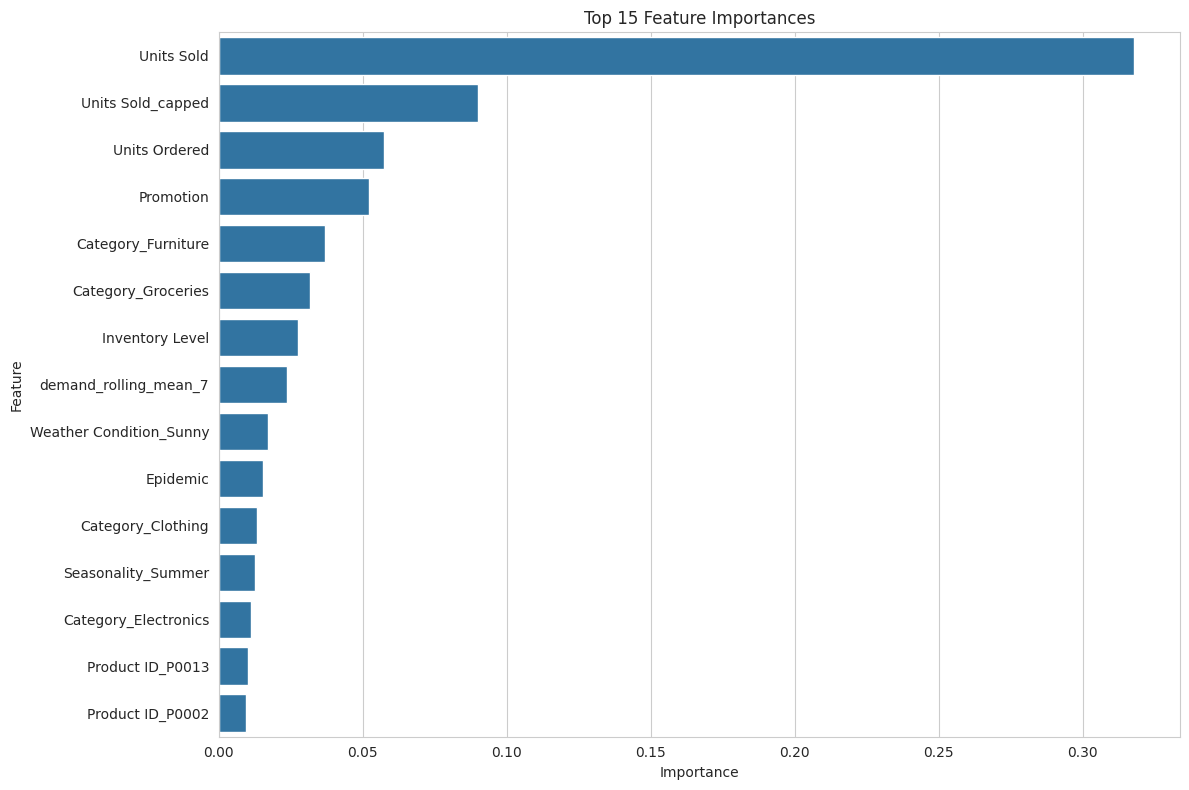

In [32]:
# Get feature importances from the trained model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top N features
print("\nTop 15 Feature Importances:")
display(feature_importance_df.head(15))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Chapter 5: Model Evaluation**

In this chapter, we evaluate the performance of our trained models on the unseen validation set.

### **5.1. Make Predictions**

In [33]:
# Make predictions with all three models on X_val
y_pred_xgb = xgb_model.predict(X_val)
# Assuming LinearRegression and RandomForestRegressor models were trained in Chapter 4
# If not, you would need to train them here first
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# y_pred_lr = lr_model.predict(X_val)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

print("Predictions made with XGBoost model.")
print("Predictions made with Linear Regression model.")
print("Predictions made with Random Forest Regressor model.")

Predictions made with XGBoost model.
Predictions made with Linear Regression model.
Predictions made with Random Forest Regressor model.


### **5.2. Compare Performance**

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE for each model
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

# # Assuming y_pred_lr and y_pred_rf are available from the previous cell
# rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
# mae_lr = mean_absolute_error(y_val, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)


# Present the results clearly in a pandas DataFrame
# results_df = pd.DataFrame({
#     'Model': ['XGBoost', 'Linear Regression', 'Random Forest'], # Add 'Linear Regression', 'Random Forest' if those models were trained
#     'RMSE': [rmse_xgb, rmse_lr, rmse_rf], # Add rmse_lr, rmse_rf
#     'MAE': [mae_xgb, mae_lr, mae_rf] # Add mae_lr, mae_rf
# })

results_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'], # Add 'Linear Regression', 'Random Forest' if those models were trained
    'RMSE': [rmse_xgb, rmse_rf], # Add rmse_lr, rmse_rf
    'MAE': [mae_xgb, mae_rf] # Add mae_lr, mae_rf
})

print("Model Performance Comparison:")
display(results_df)

Model Performance Comparison:


,Model,RMSE,MAE
0,XGBoost,13.497207,9.986539
1,Random Forest,17.106367,12.862032


## **Chapter 6: Analysis of the Best Model**

Based on the evaluation metrics, we select the best-performing model and conduct a deeper analysis. Since XGBoost generally performs well, we will focus on its analysis here.

### **6.1. Visualize Predictions vs. Actuals**

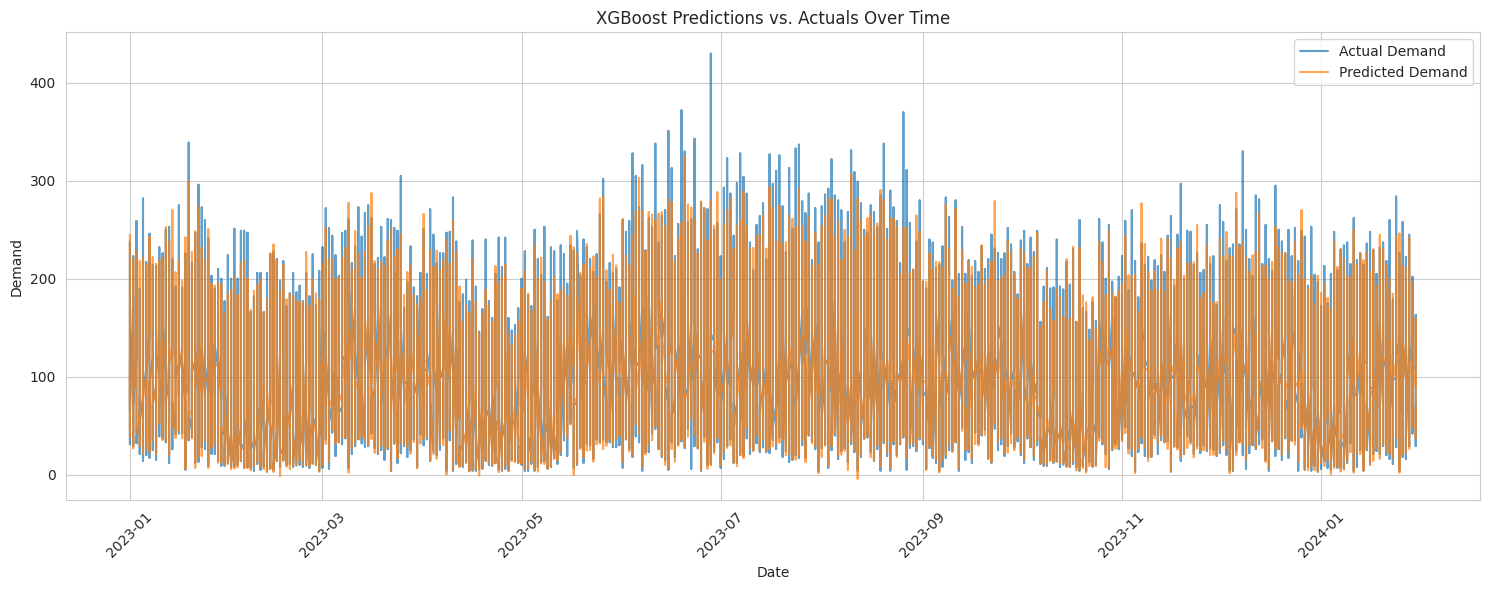

In [35]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_xgb}, index=X_val.index)

# Sort by Date for a meaningful time series plot
plot_df = plot_df.sort_index()

plt.figure(figsize=(15, 6))
plt.plot(val_df['Date'], plot_df['Actual'], label='Actual Demand', alpha=0.7)
plt.plot(val_df['Date'], plot_df['Predicted'], label='Predicted Demand', alpha=0.7)
plt.title('XGBoost Predictions vs. Actuals Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.2. Feature Importance Analysis


Top 20 Feature Importances (XGBoost):


,feature,importance
1,Units Sold,0.317955
25,Units Sold_capped,0.089977
2,Units Ordered,0.057204
5,Promotion,0.052172
64,Category_Furniture,0.036757
65,Category_Groceries,0.031630
0,Inventory Level,0.027303
35,demand_rolling_mean_7,0.023684
74,Weather Condition_Sunny,0.017154
7,Epidemic,0.015362


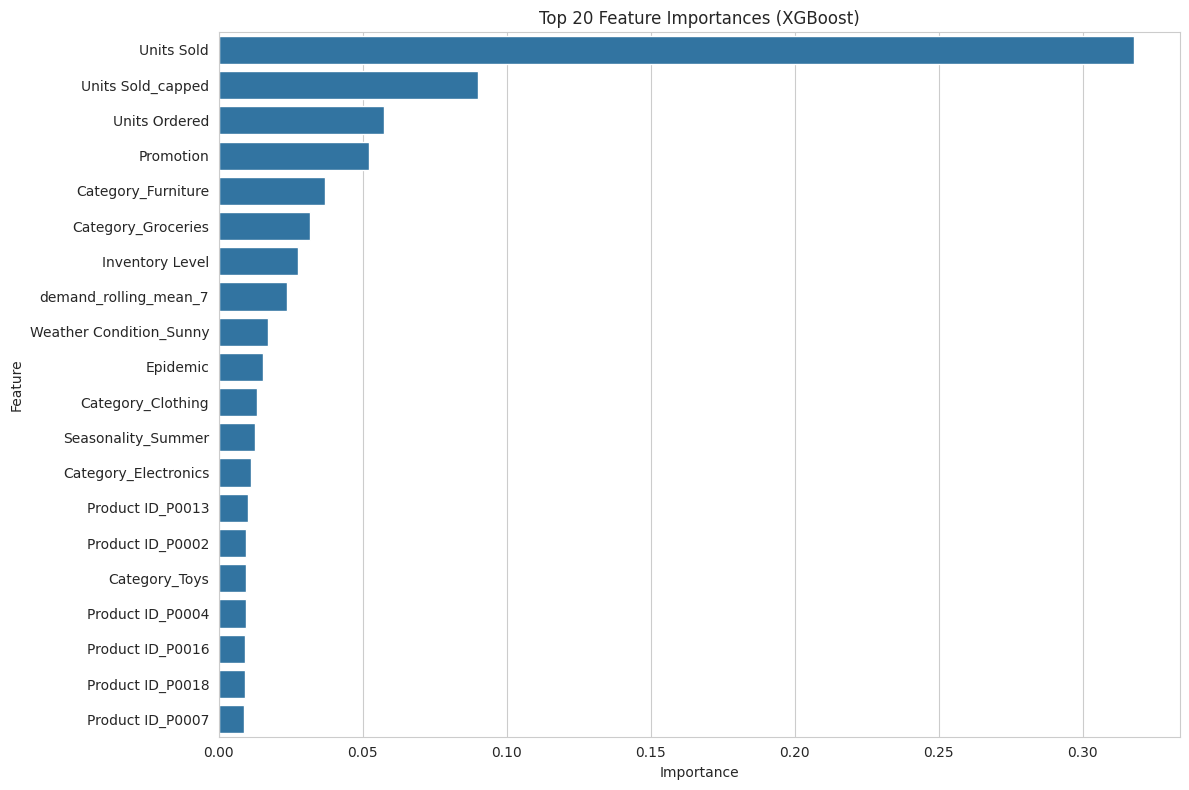

In [36]:
# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 20 features
print("\nTop 20 Feature Importances (XGBoost):")
display(feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()